In [1]:
import numpy as np
import matplotlib.pylab as plt

from wildboar.distance import matrix_profile
from wildboar.pattern import motifs, regimes
from wildboar.utils.plot import plot_time_domain

In [2]:
x = np.loadtxt("https://drive.google.com/uc?export=download&id=1DYG3rwW_zpd-7lcgYeL0Y2nHtkr2Fi0O")
x = x[20000:30000]

In [3]:
mp, mpi = matrix_profile(x, window=200, return_index=True)

<AxesSubplot:>

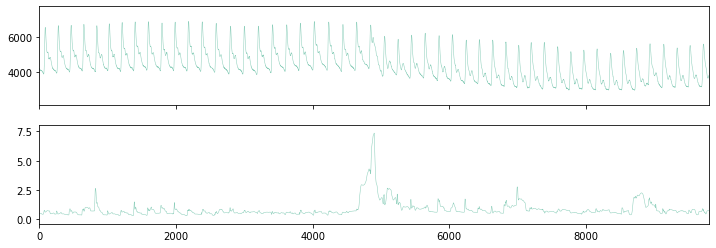

In [4]:
fig, ax = plt.subplots(nrows=2, figsize=(12, 4), sharex=True)
plot_time_domain(x, ax=ax[0])
plot_time_domain(mp, ax=ax[1])

In [5]:
motif_ind = motifs(
    x,
    mp=mp,
    max_distance=0.5,
    max_motif=6,
    min_neighbours=2,
    max_neighbours=5,
    exclude=0.2,
)

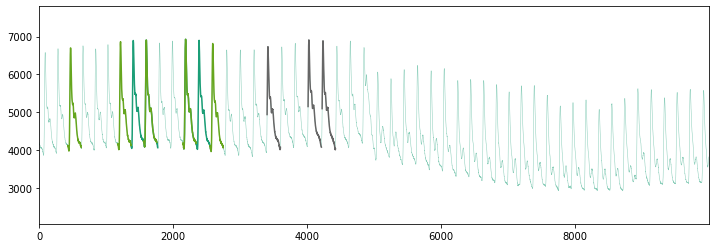

In [6]:
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)
plot_time_domain(x, ax=ax)
cmap = plt.get_cmap("Dark2", 3)
for c, ind in enumerate(motif_ind):
    for i in ind:
        ax.plot(np.arange(i, i + 200), x[i : i + 200], color=cmap(c))

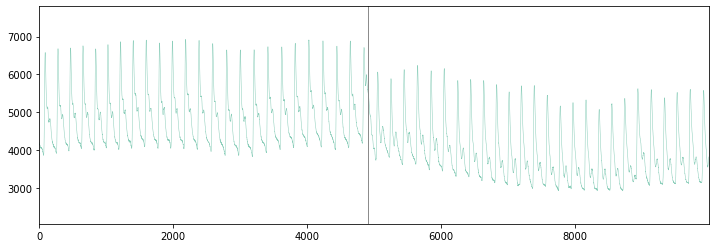

In [7]:
fig, ax = plt.subplots(figsize=(12, 4), sharex=True)
plot_time_domain(x, ax=ax)
regime = regimes(mpi=mpi, n_regimes=1)
ax.axvspan(regime, regime + 1, 0, 1, color="gray", alpha=0.9, linestyle="dashed")